In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os, gym, json
os.chdir(r'C:\Users\pierr\Desktop\Polimi\delay_mdp\dmdp')
from utils import DTRPOCore as Core
from algorithm.dtrpo import DTRPO
from utils.various import *
from utils.delays import DelayWrapper


In [1]:
table_color = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(table_color)):
        r, g, b = table_color[i]
        table_color[i] = (r / 255., g / 255., b / 255.)

In [21]:
use_belief = True
delay_proba = 0.7
max_delay = 50
stochastic_delays = False
delay = 3
env_name = 'Pendulum'
save_dir = r'C:\Users\pierr\Desktop\Polimi\delay_mdp\dmdp\output\dtrpo\delay_5_deter_belief\Pendulum-v0-20-12-23_22_42_527094'
epoch = 100

In [22]:
env = gym.make(env_name + '-v0')
# Add the delay wrapper
env = DelayWrapper(env, delay=delay, stochastic_delays=stochastic_delays, p_delay=delay_proba, max_delay=max_delay)

print(save_dir)
save_model = next(filter(lambda x: '.pt' in x, os.listdir(save_dir)))
load_parameters = os.path.join(save_dir,'model_parameters.txt')
with open(load_parameters) as text_file:
    file_args = json.load(text_file)

# Policy and belief module parameters 
ac_kwargs = dict(
    pi_hidden_sizes=[file_args['pi_hid']] * file_args['pi_l'],
    v_hidden_sizes=[file_args['v_hid']] * file_args['v_l'],
    enc_dim=file_args['enc_dim'], enc_heads=file_args['enc_heads'], enc_ff=file_args['enc_ff'],
    enc_l=file_args['enc_l'], enc_rescaling=file_args['enc_rescaling'], enc_causal=file_args['enc_causal'],
    pred_to_pi=file_args['enc_pred_to_pi'], hidden_dim=file_args['hidden_dim'], n_blocks_maf=file_args['n_blocks_maf'], 
    hidden_dim_maf=file_args['hidden_dim_maf'], lstm=file_args['lstm'], n_layers=file_args['n_layers'],
    hidden_size=file_args['hidden_size']
)

dtrpo = DTRPO(env, actor_critic=Core.TRNActorCritic, ac_kwargs=ac_kwargs, seed=0,
              save_dir=save_dir, use_belief=use_belief)



C:\Users\pierr\Desktop\Polimi\delay_mdp\dmdp\output\dtrpo\delay_5_deter_belief\Pendulum-v0-20-12-23_22_42_527094
 Number of parameters: 	 pi: 4546, 	 v: 385, 	 enc: 21240



In [28]:
dtrpo.load_session(epoch)
dtrpo.ac.enc.eval()
dtrpo.ac.pi.eval()
o = dtrpo.env.reset()

if isinstance(dtrpo.env.action_space, Discrete):
    temp_o = torch.tensor([i % dtrpo.act_dim == o[1][i // dtrpo.act_dim]
                           for i in range(dtrpo.act_dim * len(o[1]))]).float()
    o = torch.cat((torch.tensor(o[0]), temp_o.reshape(-1)))
else: 
    o = torch.cat((torch.tensor(o[0]), torch.tensor(o[1]).reshape(-1)))

o = torch.as_tensor(o, dtype=torch.float32).unsqueeze(dim=0)


In [29]:
print('State: \t\t{0} \nActions: \t{1}'.format(o[0,:3],o[0,3:]))
for s in dtrpo.env._hidden_obs:
    print(s)

State: 		tensor([ 0.9427, -0.3336, -0.3798]) 
Actions: 	tensor([-0.8399, -1.5901,  0.6923])
[ 0.94271121 -0.33360991 -0.3798151 ]
[ 0.92943012 -0.36899817 -0.75601214]
[ 0.90411413 -0.42729105 -1.27127021]
[ 0.8698545  -0.49330837 -1.48789269]


[-8.91409814e-03 -6.14202023e-03 -1.38297826e-02 -1.06011778e-02
 -6.43365085e-03 -5.57520986e-03 -1.11293048e-02 -2.08214074e-02
 -1.00437850e-02 -2.12107748e-02  1.01239979e-03  6.19634986e-04
 -1.15983784e-02 -7.21159577e-03 -1.03769600e-02  3.45653296e-03
 -1.79087371e-02 -2.57995725e-03 -6.60899282e-03 -5.06132841e-04
 -4.10607457e-03 -4.26155329e-03  2.91037560e-03 -1.37877166e-02
 -9.73646343e-03 -2.54005194e-02 -1.75967813e-03 -1.45225525e-02
 -9.50284302e-03 -1.50964111e-02 -9.99177992e-03  2.50454247e-03
  3.33972275e-03  1.46996975e-03 -2.87208408e-02  1.95184350e-03
 -1.18037760e-02 -2.67366469e-02 -7.77840614e-03 -1.29671693e-02
 -1.02340281e-02 -5.50284982e-04 -1.41682029e-02 -8.12830031e-03
 -1.25519335e-02  9.36359167e-04  6.90370798e-05 -4.46695089e-03
  4.69073653e-03 -1.23109967e-02 -9.33977962e-03 -8.84902477e-03
  2.62552500e-03 -1.59368068e-02  1.91500783e-03 -1.07255727e-02
 -2.04665363e-02  2.33054161e-05 -7.14862347e-03 -4.56312299e-03
 -1.17300749e-02 -4.98253

[]

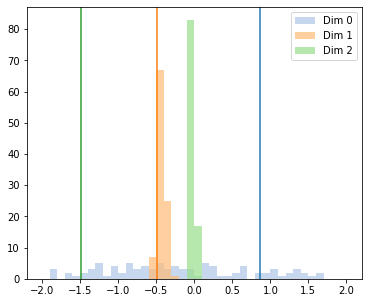

In [31]:
num_samples = 100
with torch.no_grad():
        cond = dtrpo.ac.enc.get_cond(o).detach()
cond = cond.repeat(num_samples,1,1)

dtrpo.ac.enc.maf_proba.num_inputs = 1
samples = dtrpo.ac.enc.maf_proba.sample(num_samples=num_samples, cond_inputs=cond)
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
print(samples[:,-1,2].detach().numpy())
for i in range(samples.shape[2]):
    ax.hist(samples[:,-1,i].detach().numpy(),color=table_color[2*i+1], alpha=.7, label='Dim {0}'.format(i), bins=np.arange(-2, 2 + 0.1, 0.1))
    plt.axvline(dtrpo.env._hidden_obs[-1][i],color=table_color[2*i])

plt.legend()
plt.plot()